In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:

! kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python -p "D:\classification_algo"

Dataset URL: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
License(s): other




  0%|          | 0.00/1.55k [00:00<?, ?B/s]
100%|██████████| 1.55k/1.55k [00:00<00:00, 1.59MB/s]


In [4]:
import os.path as p
from zipfile import ZipFile

path = p.abspath('customer-segmentation-tutorial-in-python.zip')

with ZipFile(path, 'r') as z :
    
    z.extractall()
    print('file extracted')

file extracted


In [5]:
data_path = p.abspath('Mall_Customers.csv')

customer_data = pd.read_csv(data_path)

In [6]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
customer_data.shape

(200, 5)

In [8]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
x = customer_data.loc[:, ['Annual Income (k$)', 'Spending Score (1-100)']].values

In [11]:
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [12]:
WCSS = []

for i in range(1, 11):
    
    k_means = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    k_means.fit(x)
    
    WCSS.append(k_means.inertia_)
    

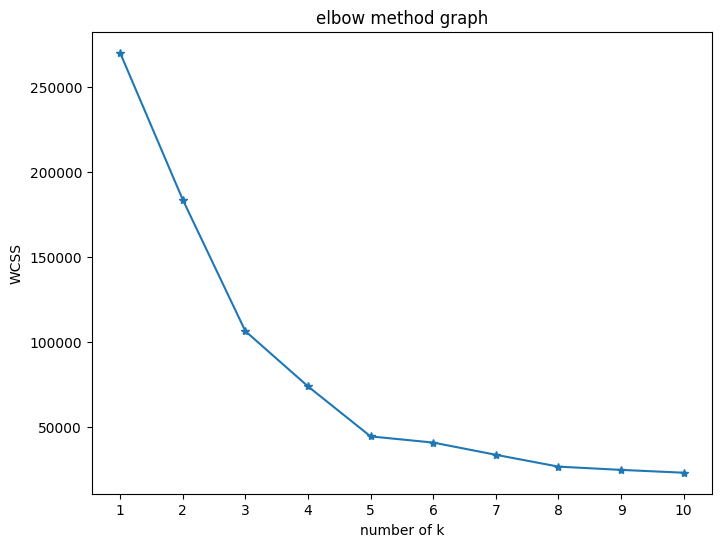

In [13]:
plt.figure(figsize = (8, 6))
plt.plot(range(1, 11), WCSS, marker = '*')
plt.title("elbow method graph")
plt.xlabel('number of k')
plt.xticks(range(1, 11))
plt.ylabel('WCSS')
plt.show()

In [14]:
print(WCSS)

[269981.28, 183653.3289473684, 106348.37306211119, 73880.64496247195, 44448.45544793371, 40825.16946386946, 33642.57922077922, 26686.83778518779, 24766.471609793436, 23103.12208598392]


In [15]:

kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)

#return a label for each data boint based on their cluster

y = kmeans.fit_predict(x)
print(y)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [16]:
print(y.shape)

(200,)


In [17]:
print(kmeans.cluster_centers_)

[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


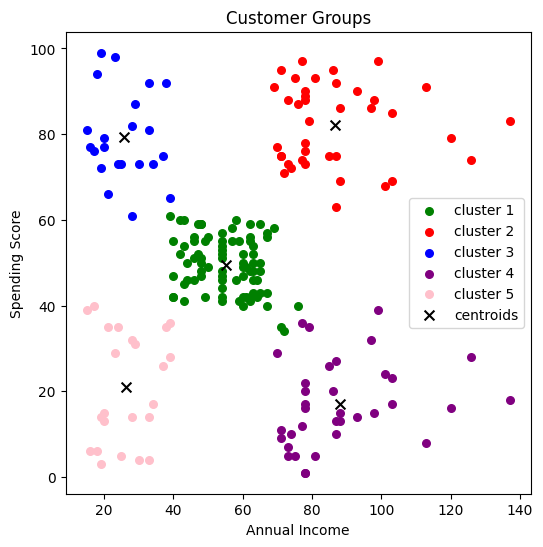

In [18]:
#plotting all points

plt.figure(figsize = (6, 6))
plt.scatter(x[y == 0,0], x[y == 0, 1], c = 'green', s = 30, label = 'cluster 1')
plt.scatter(x[y == 1, 0], x[y == 1, 1], c = 'red', s = 30 , label = 'cluster 2')
plt.scatter(x[y == 2, 0], x[y == 2, 1], c = 'blue', s = 30 , label = 'cluster 3')
plt.scatter(x[y == 3, 0], x[y == 3, 1], c = 'purple', s = 30 , label = 'cluster 4')
plt.scatter(x[y == 4, 0], x[y == 4, 1], c = 'pink', s = 30 , label = 'cluster 5')


#plotting centroids

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black',marker = 'x', label = 'centroids')

plt.legend()
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [19]:
from sklearn.metrics import silhouette_score
print(silhouette_score(x, y))

0.553931997444648
